PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

In [1]:
from graphs import getGraph , plotGraph
import networkx as nx 
import math
import numpy as np
import random 

# Load the data

In [2]:
edge_file = "./data/test"
number_of_nodes_in_web_graph = 9
beta = 0.85
epsilon=1e-6
max_iterations=100

# set up graph

In [3]:
g = getGraph(edge_file)
edges = g.get_connections()

In [4]:
G = nx.DiGraph() 
G.add_nodes_from(range(number_of_nodes_in_web_graph))
for edge in edges:
    for i in edges[edge]:
        G.add_edge(edge, i ) 

# PageRank with Networkx

In [5]:
p_dict = nx.pagerank(G)
final_rank_vector = []
for i in range(G.number_of_nodes()):
    final_rank_vector.append(p_dict[i]*5000)

[7, 2, 8, 3, 6, 0, 5, 1, 4]


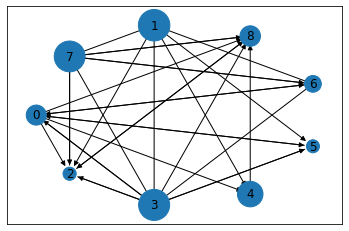

In [6]:
graph = plotGraph(edges, interval=3000)
graph.plot(9, final_rank_vector)

# PageRank using Power Method

In [7]:
def PageRank( beta, edges, epsilon, max_iterations, node_num):
    final_rank_vector = np.zeros(node_num)
    initial_rank_vector = np.fromiter(
    [1 / node_num for _ in range(node_num)], dtype='float')
    iterations = 0
    diff = math.inf

    pg = plotGraph(edges, interval=3000)
    
    while(iterations < max_iterations and diff > epsilon):
        new_rank_vector = np.zeros(node_num)
        for parent in edges:
            for child in edges[parent]:
                new_rank_vector[child] += (initial_rank_vector[parent] /len(edges[parent]))

        leaked_rank = (1-sum(new_rank_vector))/node_num
        final_rank_vector = new_rank_vector + leaked_rank
        diff = sum(abs(final_rank_vector - initial_rank_vector))
        initial_rank_vector = final_rank_vector
        iterations += 1
        print("PageRank iteration: " + str(iterations))

        pg.plot(9, final_rank_vector*5000)
        #print(final_rank_vector)


    #return final_rank_vector
        

PageRank iteration: 1
[8, 7, 3, 2, 0, 5, 6, 4, 1]


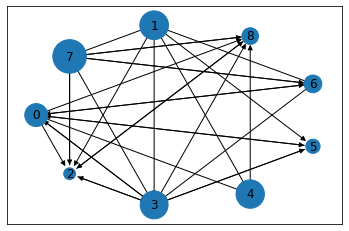

PageRank iteration: 2
[2, 7, 8, 3, 0, 6, 5, 4, 1]


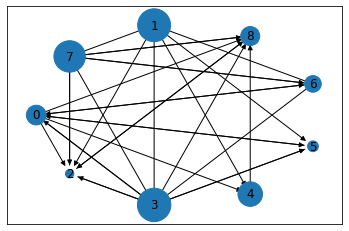

PageRank iteration: 3
[7, 2, 8, 3, 6, 0, 5, 1, 4]


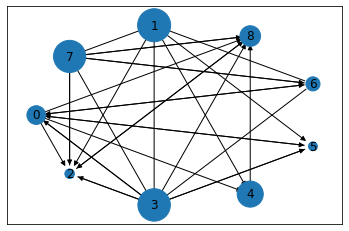

PageRank iteration: 4
[7, 2, 8, 3, 6, 0, 5, 1, 4]


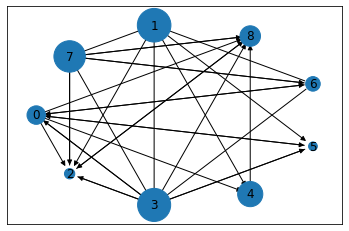

PageRank iteration: 5
[7, 2, 8, 3, 6, 0, 5, 1, 4]


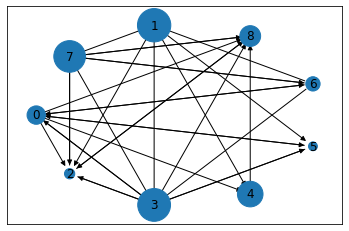

PageRank iteration: 6
[7, 2, 8, 3, 6, 0, 5, 1, 4]


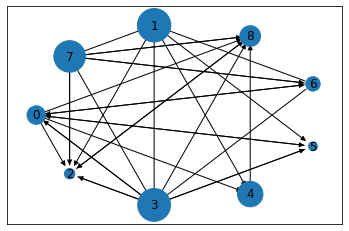

PageRank iteration: 7
[7, 2, 8, 3, 6, 0, 5, 1, 4]


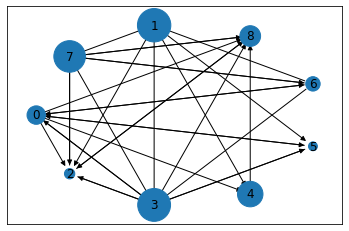

PageRank iteration: 8
[7, 2, 8, 3, 6, 0, 5, 1, 4]


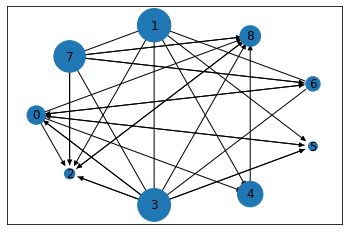

PageRank iteration: 9
[7, 2, 8, 3, 6, 0, 5, 1, 4]


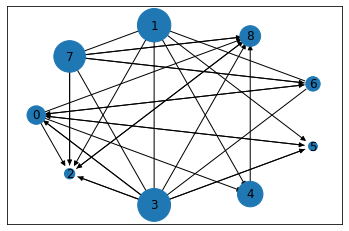

PageRank iteration: 10
[7, 2, 8, 3, 6, 0, 5, 1, 4]


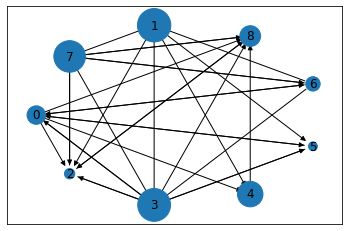

PageRank iteration: 11
[7, 2, 8, 3, 6, 0, 5, 1, 4]


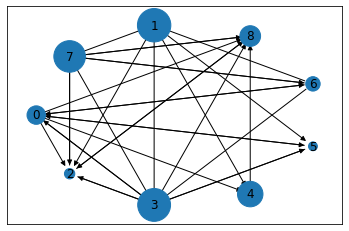

PageRank iteration: 12
[7, 2, 8, 3, 6, 0, 5, 1, 4]


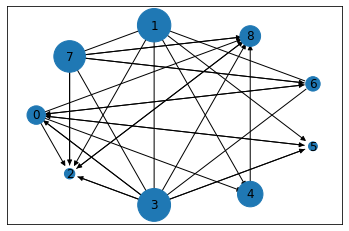

PageRank iteration: 13
[7, 2, 8, 3, 6, 0, 5, 1, 4]


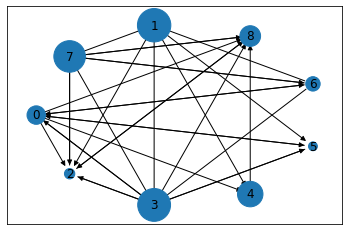

PageRank iteration: 14
[7, 2, 8, 3, 6, 0, 5, 1, 4]


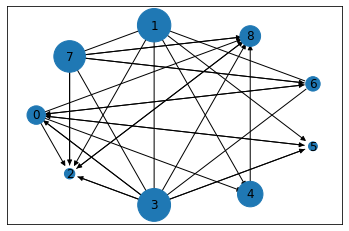

PageRank iteration: 15
[7, 2, 8, 3, 6, 0, 5, 1, 4]


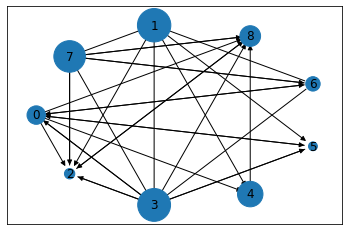

PageRank iteration: 16
[7, 2, 8, 3, 6, 0, 5, 1, 4]


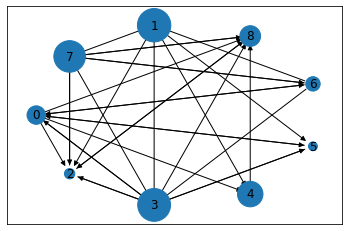

PageRank iteration: 17
[7, 2, 8, 3, 6, 0, 5, 1, 4]


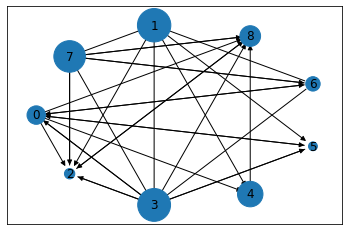

PageRank iteration: 18
[7, 2, 8, 3, 6, 0, 5, 1, 4]


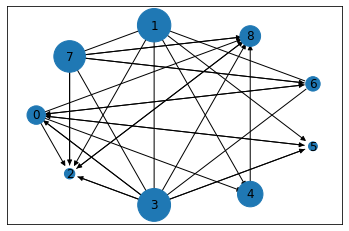

PageRank iteration: 19
[7, 2, 8, 3, 6, 0, 5, 1, 4]


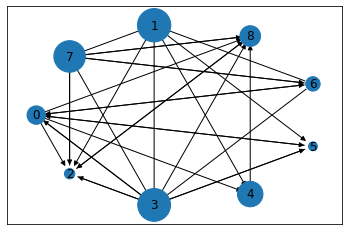

In [8]:
PageRank(beta, edges, epsilon, max_iterations, number_of_nodes_in_web_graph)

# PageRank with Random walk 

In [9]:
def random_Walk(g): 
    rwp = [0 for i in range(g.number_of_nodes())] 
    nodes = list(g.nodes()) 
    r = random.choice(nodes) 
    rwp[r] += 1
    neigh = list(g.out_edges(r)) 
    z = 0
    
    while (z != 10000): 
        if (len(neigh) == 0): 
            focus = random.choice(nodes) 
        else: 
            r1 = random.choice(neigh) 
            focus = r1[1] 
        rwp[focus] += 0.7
        neigh = list(g.out_edges(focus)) 
        z += 1
    return rwp 

[7, 2, 8, 3, 6, 0, 5, 1, 4]


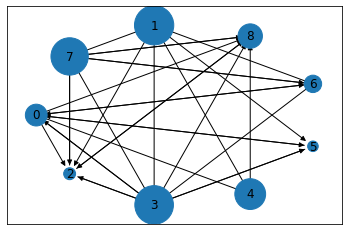

In [10]:
graph = plotGraph(edges, interval=3000)
graph.plot(9, random_Walk(G))